Multi-task Cascade Convolutional Neural Network, or MTCNN for short.

After completing this tutorial, you will know:

-Face detection is a non-trivial computer vision problem for identifying and localizing faces in images.

-Face detection can be performed using the classical feature-based cascade classifier using the OpenCV library.

-State-of-the-art face detection can be achieved using a Multi-task Cascade CNN via the MTCNN library.

# Part 1  - Face Detection

Localizing one or more faces in a photograph

Perhaps the most successful example is a technique called cascade classifiers first described by Paul Viola and Michael Jones and their 2001 paper 

https://ieeexplore.ieee.org/document/990517

ada boost explanation : https://machinelearningmastery.com/boosting-and-adaboost-for-machine-learning/

AdaBoost is best used to boost the performance of decision trees on binary classification problems.

In the paper, the AdaBoost model is used to learn a range of very simple or weak features in each face, that together provide a robust classifier.

In [1]:
import cv2
from cv2 import CascadeClassifier
from cv2 import imread
from cv2 import rectangle
from cv2 import imshow
from cv2 import waitKey

In [2]:
cv2.__version__

'4.1.0'

In [3]:
#load the pre-trained model
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')

In [4]:
def perform_face_detection(pixels):
    boxes = classifier.detectMultiScale(pixels)
    #print bounding box for eac detected face 
    for box in boxes:
        print(box)
    return boxes

In [5]:
img = imread("test1.jpg")

In [6]:
img.shape

(427, 640, 3)

In [7]:
boxes = perform_face_detection(img)

[174  75 107 107]
[360 102 101 101]


Each box lists the x and y coordinates for the bottom-left-hand-corner of the bounding box, as well as the width and the height. The results suggest that two bounding boxes were detected.

In [8]:
print(boxes)

[[174  75 107 107]
 [360 102 101 101]]


In [9]:
def show_faces(boxes,img):
    #extract boxes from the image 
    
    for box in boxes:
    
        x, y, width, height = box 
        x2, y2 = x + width, y + height

        rectangle(img, (x,y), (x2, y2), (0,0,255), 1)
        
    imshow('face detection', img)
    waitKey(0)

In [10]:
show_faces(perform_face_detection(imread("test2.jpg")), imread("test2.jpg") )

[ 97 267  49  49]
[207 263  48  48]
[317 270  43  43]
[366 156  42  42]
[255 147  42  42]
[504 155  40  40]
[151 146  46  46]
[257  17  66  66]
[452 262  40  40]
[335  29  34  34]
[313 248  55  55]
[127  31  40  40]
[218  39  43  43]
[427  48  38  38]


Running the code is noticeable tha~t there are some mistakes (i.e. one face is not detected and another one is detected two times etc ... )
The model detectMultiScales gives the possibility of tuning some parameters in order to try fixing these errors

In [11]:
def perform_face_detection_2(pixels):
    
    # the first parameter is the scaleFactor : resizing the image can help 
    # the second parameter is the minneighbours
    boxes = classifier.detectMultiScale(pixels, 1.05, 11)
    
    #print bounding box for eac detected face determines how robust 
    #each detection must be in order to be reported, e.g. the number
    #of candidate rectangles that found the face. The default is 3, but this can be lowered to 1 to detect a lot more faces and will likely increase the false positives, or increase to 6 or more to require a lot more confidence before a face is detected.
    
    for box in boxes:
        print(box)
    return boxes

In [12]:
show_faces(perform_face_detection_2(imread("test2.jpg")), imread("test2.jpg") )

[ 96 266  50  50]
[366 156  44  44]
[316 269  44  44]
[255 147  43  43]
[208 264  45  45]
[452 263  39  39]
[334  29  35  35]
[219  40  42  42]
[127  29  41  41]
[428  48  38  38]


# Face Detection With Deep Learning


The Multi-Task Cascaded Convolutional Neural Network or MTCNN reached state of art results on a range of benchmark datasets because it is capable of recognizing other facial features such as eyes and mouth, called landmark detection 

The network uses a cascade structure with three networks; first the image is rescaled to a range of different sizes (called an image pyramid), then the first model (Proposal Network or P-Net) proposes candidate facial regions, the second model (Refine Network or R-Net) filters the bounding boxes, and the third model (Output Network or O-Net) proposes facial landmarks.

In [93]:
from IPython.display import Image

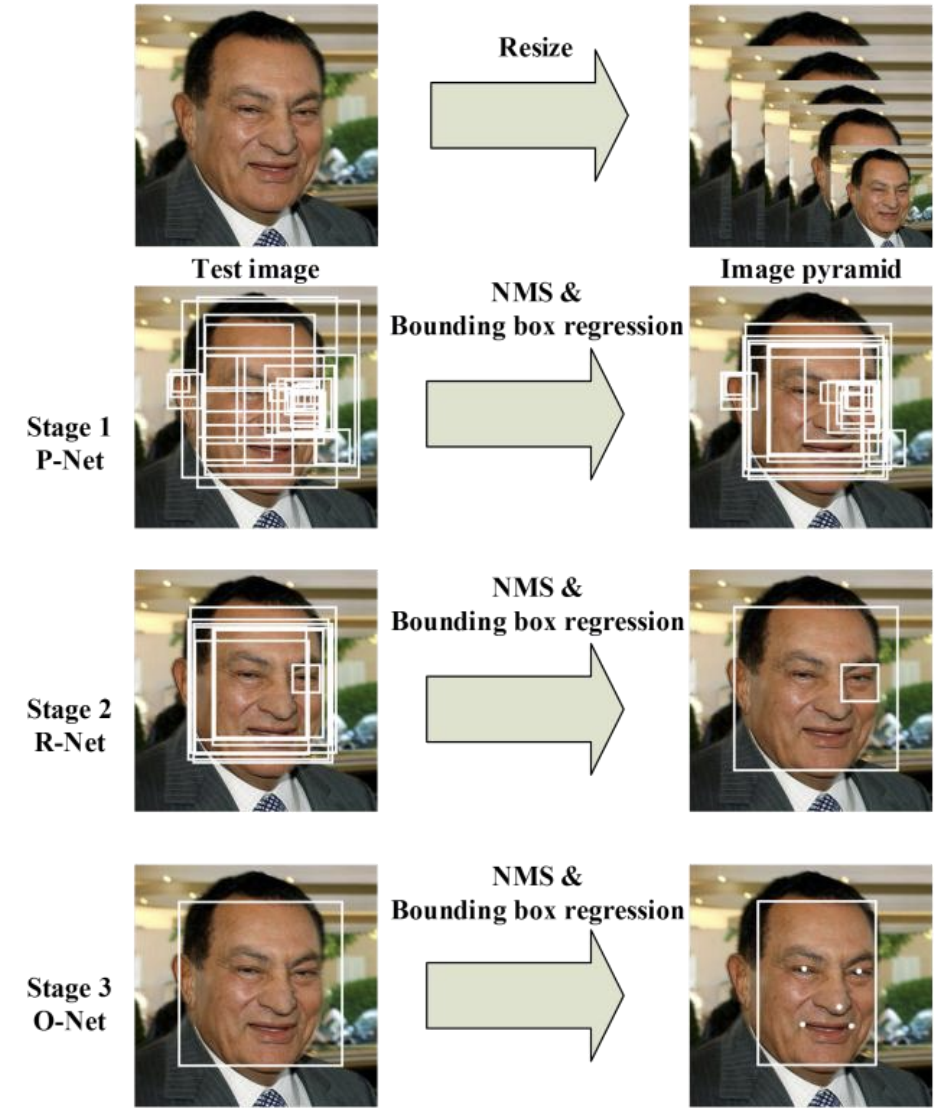

In [94]:
Image("mtcnn.png")


In [1]:
import mtcnn
mtcnn.__version__

'0.0.9'

In [10]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Circle

def recognize_mtcnn(pixels):

    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    faces = detector.detect_faces(pixels)
    print(pixels)
    for face in faces:
        print(face)
    return faces

In [11]:
s = recognize_mtcnn(pyplot.imread("test2.jpg"))

[[[248 250 247]
  [251 255 250]
  [254 255 250]
  ...
  [253 255 254]
  [252 254 253]
  [251 253 252]]

 [[249 255 255]
  [243 249 249]
  [249 251 248]
  ...
  [251 253 252]
  [250 252 251]
  [250 252 251]]

 [[201 215 228]
  [245 254 255]
  [255 255 255]
  ...
  [254 255 253]
  [252 255 253]
  [252 255 253]]

 ...

 [[110 115 135]
  [103 108 128]
  [101 108 127]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[118 120 141]
  [109 114 134]
  [113 118 138]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[117 120 139]
  [110 113 132]
  [111 116 135]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
{'box': [320, 268, 31, 41], 'confidence': 0.9999721050262451, 'keypoints': {'left_eye': (330, 286), 'right_eye': (345, 285), 'nose': (339, 296), 'mouth_left': (331, 301), 'mouth_right': (345, 301)}}
{'box': [226, 39, 30, 40], 'confidence': 0.9999593496322632, 'keypoints': {'left_eye': (233, 56), 'right_eye': (248, 55), 'nose': (241, 63), 'mouth_left': (234, 70), 'mout

In [117]:
def facial_landmark(faces,filename):
    
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    
    
    # get the context for drawing boxes
    ax = pyplot.gca()
    
    for face in faces:
        for key,value in face['keypoints'].items():
            dot = Circle(value, radius=2, color = 'yellow')
            ax.add_patch(dot)
    
    #show the plot
    pyplot.show()
            
            
        
        

{'box': [320, 268, 31, 41], 'confidence': 0.9999721050262451, 'keypoints': {'left_eye': (330, 286), 'right_eye': (345, 285), 'nose': (339, 296), 'mouth_left': (331, 301), 'mouth_right': (345, 301)}}
{'box': [226, 39, 30, 40], 'confidence': 0.9999593496322632, 'keypoints': {'left_eye': (233, 56), 'right_eye': (248, 55), 'nose': (241, 63), 'mouth_left': (234, 70), 'mouth_right': (249, 69)}}
{'box': [373, 155, 31, 43], 'confidence': 0.9999196529388428, 'keypoints': {'left_eye': (380, 173), 'right_eye': (394, 171), 'nose': (387, 181), 'mouth_left': (382, 188), 'mouth_right': (396, 186)}}
{'box': [432, 45, 33, 45], 'confidence': 0.9998043179512024, 'keypoints': {'left_eye': (439, 64), 'right_eye': (454, 60), 'nose': (447, 70), 'mouth_left': (443, 78), 'mouth_right': (457, 74)}}
{'box': [133, 30, 29, 40], 'confidence': 0.9997820258140564, 'keypoints': {'left_eye': (141, 45), 'right_eye': (156, 45), 'nose': (148, 53), 'mouth_left': (140, 58), 'mouth_right': (155, 59)}}
{'box': [63, 149, 31, 3

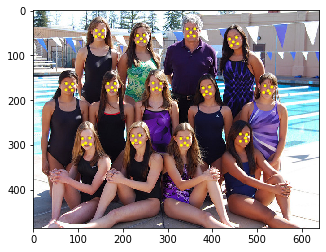

In [119]:
#load image from file
pixels = pyplot.imread("test2.jpg")
facial_landmark(recognize_mtcnn(pixels),'test2.jpg')